# 2nd Order PLL Modeling

In [20]:
from scipy.signal import freqs
import numpy as np
log_freqs = np.logspace(4,9,1000)
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets

f_gain = 3.18e+04, f_zero = 7.96e+05, f_3dB = 2.49e+05, Peaking = 14.19, f_3dB_ojtf = 1.03e+05


<function __main__.calc_plot_pll_from_w_nat_damp_fact>

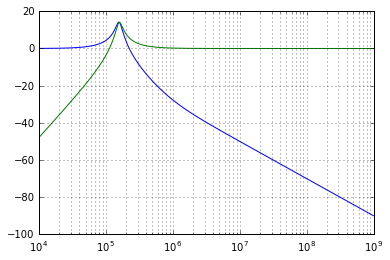

In [42]:
# Convert w_nat & damping factor to gain, zero, 3dB
def calc_plot_pll_from_w_nat_damp_fact(w_nat, damp_fact):
    f_gain = (2*w_nat*damp_fact)/(2*np.pi)
    f_zero = (w_nat/(2*damp_fact))/(2*np.pi)
    f_3dB = (w_nat*sqrt(1+2*damp_fact**2+sqrt((1+2*damp_fact**2)**2+1)))/(2*np.pi)
    f_3dB_ojtf = (w_nat*sqrt((2*damp_fact**2)-1+sqrt(((2*damp_fact**2)-1)**2+1)))/(2*np.pi)
    b_pll,a_pll = [2*damp_fact*w_nat, w_nat**2], [1, 2*damp_fact*w_nat, w_nat**2]
    w_pll,jtf_pll = freqs(b_pll,a_pll, worN = 2*np.pi*log_freqs)
    ojtf_pll = 1-jtf_pll
    plt.semilogx(w_pll/(2*pi),20*log10(abs(jtf_pll)))
    plt.semilogx(w_pll/(2*pi),20*log10(abs(ojtf_pll)))
    plt.grid(1, which = "both")
    peaking = max(20*np.log10(np.abs(jtf_pll)))
    print "f_gain = %.2e, f_zero = %.2e, f_3dB = %.2e, Peaking = %.2f, f_3dB_ojtf = %.2e" %(f_gain,f_zero,f_3dB,peaking,f_3dB_ojtf)

w_nat = ipywidgets.FloatSlider(value = 1e6,min = 1e6,max = 1e7, step = 1e6, description = "Natural Frequency")
damp_fact = ipywidgets.FloatSlider(value = 0.1, min = 0.1, max = 10, step = 0.1, description = "Damping Factor")
ipywidgets.interact(calc_plot_pll_from_w_nat_damp_fact, w_nat = w_nat, damp_fact = damp_fact)

f_gain = 2.95e+06, f_zero = 4.85e+04, w_nat 2.38e+06, Peaking = 0.12, f_3dB_ojtf = 2.90e+06


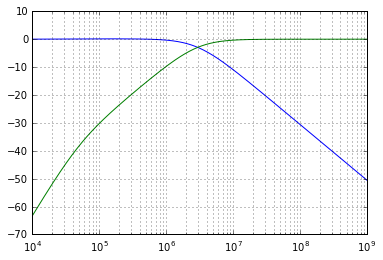

In [43]:
# Convert 3dB & Damping to Gain, Zero & w_nat
def calc_plot_pll_from_f_3dB_damp_fact(f_3dB, damp_fact):
    w_nat = 2*np.pi*f_3dB/sqrt(1+2*damp_fact**2+sqrt((1+2*damp_fact**2)**2+1))
    f_gain = (2*w_nat*damp_fact)/(2*np.pi)
    f_zero = (w_nat/(2*damp_fact))/(2*np.pi)
    f_3dB_ojtf = (w_nat*sqrt((2*damp_fact**2)-1+sqrt(((2*damp_fact**2)-1)**2+1)))/(2*np.pi)
    b_pll,a_pll = [2*damp_fact*w_nat, w_nat**2], [1, 2*damp_fact*w_nat, w_nat**2]
    w_pll,jtf_pll = freqs(b_pll,a_pll, worN = 2*np.pi*log_freqs)
    ojtf_pll = 1-jtf_pll
    plt.semilogx(w_pll/(2*pi),20*log10(abs(jtf_pll)))
    plt.semilogx(w_pll/(2*pi),20*log10(abs(ojtf_pll)))
    plt.grid(1, which = "both")
    peaking = np.max(20*np.log10(np.abs(jtf_pll)))
    print "f_gain = %.2e, f_zero = %.2e, w_nat %.2e, Peaking = %.2f, f_3dB_ojtf = %.2e" %(f_gain,f_zero,w_nat,peaking,f_3dB_ojtf)
    
f_3dB = ipywidgets.FloatSlider(value = 1e6,min = 1e6,max = 1e7, step = 1e6, description = "3dB Frequency")
damp_fact = ipywidgets.FloatSlider(value = 0.1, min = 0.1, max = 10, step = 0.1, description = "Damping Factor")
ipywidgets.interact(calc_plot_pll_from_f_3dB_damp_fact, f_3dB = f_3dB, damp_fact = damp_fact)